In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from regain.covariance import TimeGraphicalLasso

In [2]:
with np.load('../draws_sim_p_10_f_3_T_100_b_10000_d_10000.npz') as data_:
    data = data_['arr_0']
data = data[:, :, 0:50, 0:30]

In [3]:
alpha = [0, 5, 10, 15, 20]
beta = 10

Text(0.5, 1.0, 'Difference in Losses across $\\alpha$s')

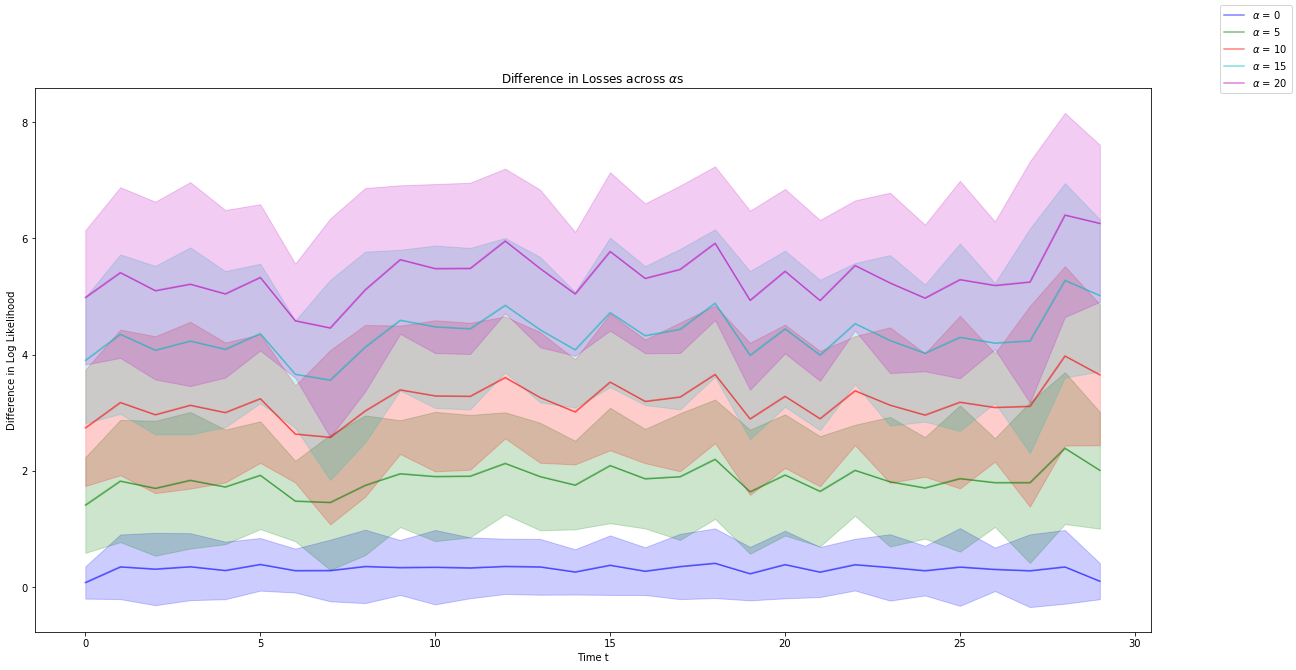

In [4]:
fig, ax = plt.subplots(figsize=(20, 10))
colors = "bgrcmykw"
color_index = 0

for i in alpha:
    emp_diff, sam_diff = TimeGraphicalLasso(alpha=i, beta=beta, max_iter=1000, psi='kernel', gamma=0.9).fit_cov(data).eval_pre(data)
    std = np.std(sam_diff, 1)

    ax.plot(range(30), emp_diff, color=colors[color_index], alpha=0.5, label=r'$\alpha$ = {}'.format(i))
    ax.fill_between(range(30), emp_diff, emp_diff - std, color=colors[color_index], alpha=0.2)
    ax.fill_between(range(30), emp_diff, emp_diff + std, color=colors[color_index], alpha=0.2)
    color_index += 1

fig.legend()
ax.set_ylabel('Difference in Log Likelihood')
ax.set_xlabel('Time t')
ax.set_title(r'Difference in Losses across $\alpha$s')  